In [10]:
# Mengimpor library NumPy dan memberinya alias 'np' untuk operasi numerik.
import numpy as np
# Mengimpor library Pandas dan memberinya alias 'pd' untuk manipulasi data.
import pandas as pd
# Mengimpor modul 'pyplot' dari Matplotlib dan memberinya alias 'plt' untuk visualisasi data.
from matplotlib import pyplot as plt
# Mengimpor kelas 'LinearRegression' dari modul 'linear_model' di Scikit-learn untuk membuat model regresi linear.
from sklearn.linear_model import LinearRegression

In [11]:
# Membaca data dari file 'R02_rice_field.csv' menggunakan fungsi read_csv() dari pandas
# dan menyimpannya dalam variabel bernama 'dataset'.
dataset = pd.read_csv('R02_rice_field.csv')
# Menampilkan isi dari variabel 'dataset' yang berisi data dari file CSV.
dataset

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


In [12]:
# Membaca data dari file 'R02_rice_field.csv' dan menyimpannya dalam DataFrame bernama 'df'.
dataset = pd.read_csv('R02_rice_field.csv')
# Mengubah nama kolom DataFrame 'dataset' menjadi 'production' dan 'harvest'.
dataset.columns = ['production', 'harvest']
# Menampilkan DataFrame 'dataset' yang sudah diubah nama kolomnya.
dataset

,production,harvest
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


In [13]:
# Mengubah nama kolom DataFrame 'dataset'.
dataset.columns = ['x', 'y']
# 'dataset.columns' mengakses nama kolom DataFrame.
# ['x', 'y'] adalah list berisi nama kolom baru.
# Kode ini mengubah nama kolom 'production' menjadi 'x' dan 'harvest' menjadi 'y'.

# Menampilkan DataFrame 'dataset' yang sudah diubah nama kolomnya.
print(dataset)
# Fungsi 'print()' menampilkan isi dari DataFrame 'dataset' ke layar.

              x          y
0    1329536.00  323589.00
1    1299699.00  329041.00
2    1382905.00  339253.00
3    1419128.00  348223.00
4    1368074.00  337561.00
..          ...        ...
219  3831923.00  390799.00
220  4090654.00  396559.00
221  2488641.91  511940.93
222  2164089.33  464103.42
223  2604913.29  545149.05

[224 rows x 2 columns]


In [14]:
dataset.corr()
# Menghitung korelasi antar kolom dalam DataFrame 'dataset'.
# Secara default, menggunakan koefisien korelasi Pearson.
# Hasilnya berupa tabel (matriks korelasi)
# yang menunjukkan seberapa kuat hubungan antar kolom.

,x,y
x,1.000000,0.905622
y,0.905622,1.000000


In [15]:
# Mengambil nilai kolom 'x' dari DataFrame 'dataset' dan mengubahnya menjadi array 2D.
# np.newaxis digunakan untuk menambahkan dimensi baru, sehingga cocok untuk model machine learning.
x_train = dataset['x'].values[:,np.newaxis]
# Mengambil nilai kolom 'y' dari DataFrame 'dataset' dan mengubahnya menjadi array 1D.
y_train = dataset['y'].values

# Membuat objek model Linear Regression.
lm = LinearRegression()
# Melatih model Linear Regression menggunakan data 'x_train' sebagai fitur dan 'y_train' sebagai target.
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
# x_test didefinisikan sebagai list of lists,
# merepresentasikan data input baru yang ingin diprediksi.
# Setiap sub-list berisi satu nilai 'x' (production)
# yang akan digunakan untuk memprediksi 'y' (harvest).
x_test = [[1329536.00], [1299699.00], [1382905.00], [1419128.00], [1368074.00], [1404580.00]]
# Model 'lm' (Linear Regression) yang sudah dilatih
# digunakan untuk memprediksi nilai 'y' (harvest)
# berdasarkan data input 'x_test'.
# Hasil prediksi disimpan dalam variabel 'p'.
p = lm.predict(x_test)

In [17]:
print('Coefficient : ' + str(lm.coef_)) # Menampilkan koefisien (kemiringan garis regresi).
print('Intercept : ' + str(lm.intercept_)) # Menampilkan intercept (titik potong garis regresi dengan sumbu y).

Coefficient : [0.1814938]
Intercept : 69494.67373244301


<function matplotlib.pyplot.show(close=None, block=None)>

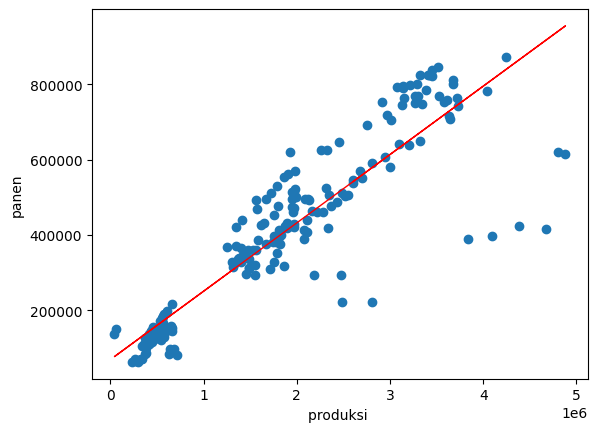

In [19]:
# Memprediksi nilai 'y' (panen) menggunakan data pelatihan 'x_train' dan menyimpannya dalam variabel 'pb'.
pb = lm.predict(x_train)
# Membuat DataFrame baru 'datasetc' dengan kolom 'x' (produksi) dari dataset asli dan kolom 'y' (prediksi panen) dari 'pb'.
datasetc = pd.DataFrame({'x' : dataset['x'], 'y' : pb})
# Membuat scatter plot dari data asli, dengan 'x' (produksi) di sumbu horizontal dan 'y' (panen) di sumbu vertikal.
plt.scatter(dataset['x'],dataset['y'])
# Membuat garis regresi linear berdasarkan prediksi 'datasetc', dengan warna merah dan ketebalan garis 1.
plt.plot(dataset['x'], datasetc['y'], color = 'red', linewidth = 1)
# Memberi label 'produksi' pada sumbu horizontal.
plt.xlabel('produksi ')
# Memberi label 'panen' pada sumbu vertikal.
plt.ylabel('panen')
# Menampilkan plot yang telah dibuat.
plt.show

In [20]:
# y_asli adalah list yang berisi nilai panen aktual (ground truth).
# [511940.93, 464103.42, 545149.05] merepresentasikan 3 nilai panen asli.
y_asli = [511940.93, 464103.42, 545149.05]

# lm.predict() digunakan untuk memprediksi nilai panen
# berdasarkan data produksi yang baru.
# Data produksi baru diinput sebagai list of lists:
# [[2488641.91], [2164089.33], [2604913.29]]
# Setiap sub-list merepresentasikan satu nilai produksi.
y_hasil_prediksi = lm.predict([[2488641.91], [2164089.33], [2604913.29]])

# print() digunakan untuk menampilkan hasil prediksi panen
# yang disimpan dalam variabel y_hasil_prediksi.
print(y_hasil_prediksi)


[521167.74544383 462263.46510064 542270.2797802 ]


In [21]:
from sklearn.metrics import r2_score # Mengimpor fungsi r2_score dari modul sklearn.metrics
akurasi = r2_score(y_asli, y_hasil_prediksi) # Menghitung R-squared (akurasi) model dengan membandingkan nilai asli (y_asli) dan nilai prediksi (y_hasil_prediksi)
print(akurasi*100) # Menampilkan akurasi dalam persentase dengan mengalikan nilai R-squared dengan 100

97.08401337218851
